In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install emoji
!pip install wordsegment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 74.4 MB/s eta 0:00:00


In [ ]:
# Data Pre-processing step

import pandas as pd
import re
import emoji
import sys
### MODIFICATION: Import wordsegment and load its data ###
import wordsegment
wordsegment.load()

print("Starting ADVANCED preprocessing script...")

def advanced_clean_text(text):

    # 1. Ensure text is a string
    if not isinstance(text, str):
        return ""

    # 2. Convert Emojis to Text
    text = emoji.demojize(text, delimiters=(" :", ": "))

    # 3. Convert to lowercase
    text = text.lower()

    # 4. Normalize Slang, Abbreviations
    slang_map = {
        # --- General Hinglish Normalization ---\
        r'\bnhi\b': 'nahi',
        r'\bनह\b': 'nahi',
        r'\baur\b': 'aur',
        r'\bऔर\b': 'aur',
        r'\bkr\b': 'kar',
        r'\bकर\b': 'kar',
        r'\bpe\b': 'par',
        r'\bपर\b': 'par',
        r'\bbhai\b': 'brother',
        r'\bbro\b': 'brother',
        r'\bdesh\b': 'desh',
        r'\bदश\b': 'desh',
        r'\bbaat\b': 'baat',
        r'\bबत\b': 'baat',
        r'\braha\b': 'raha',
        r'\brahe\b': 'rahe',
        r'\bरह\b': 'raha',

    }

    for pattern, replacement in slang_map.items():
        text = re.sub(pattern, replacement, text)

    # 5. Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

    # 6. Remove user mentions (@username)
    text = re.sub(r'@\w+', '', text)

    # 7. ### MODIFICATION: Split hashtags into component words ###
    # Old: text = re.sub(r'#(\w+)', r'\1', text)
    text = re.sub(r'#(\w+)', lambda m: ' '.join(wordsegment.segment(m.group(1))), text)

    # 8. Remove punctuation (keeps words, numbers, spaces, colons, !, and ?)
    text = re.sub(r'[^\w\s:!?]', '', text)

    # 9. Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# --- Main Preprocessing Script ---

# Define original file names
train_file = "/content/drive/MyDrive/DL Project/agr_hi_train.csv"
dev_file = "/content/drive/MyDrive/DL Project/agr_hi_dev.csv"

# Define NEW output file names
train_cleaned_file = "train_advanced_cleaned.csv"
dev_cleaned_file = "dev_advanced_cleaned.csv"

print(f"Loading '{train_file}' and '{dev_file}'...")

try:
    # 1. Load the datasets (no header)
    df_train = pd.read_csv(train_file, header=None)
    df_dev = pd.read_csv(dev_file, header=None)

    # 2. Rename columns
    col_names = ['id', 'text', 'label']
    df_train.columns = col_names
    df_dev.columns = col_names

    # 3. Handle potential missing text values
    df_train = df_train.dropna(subset=['text'])
    df_dev = df_dev.dropna(subset=['text'])

    # 4. Apply the ADVANCED cleaning function
    print("Applying advanced text cleaning function... (this may take a minute)")
    df_train['cleaned_text'] = df_train['text'].apply(advanced_clean_text)
    df_dev['cleaned_text'] = df_dev['text'].apply(advanced_clean_text)

    # 5. Encode labels
    print("Encoding labels...")
    label_map = {'NAG': 0, 'CAG': 1, 'OAG': 2}
    df_train['label_encoded'] = df_train['label'].map(label_map)
    df_dev['label_encoded'] = df_dev['label'].map(label_map)

    # 6. Save the processed data
    df_train_to_save = df_train[['cleaned_text', 'label_encoded']]
    df_dev_to_save = df_dev[['cleaned_text', 'label_encoded']]

    # Handling potential empty rows after cleaning
    df_train_to_save = df_train_to_save.dropna(subset=['cleaned_text'])
    df_dev_to_save = df_dev_to_save.dropna(subset=['cleaned_text'])

    df_train_to_save.to_csv(train_cleaned_file, index=False)
    df_dev_to_save.to_csv(dev_cleaned_file, index=False)

    print("\n" + "="*50)
    print("--- Advanced Preprocessing Complete ---")
    print(f"Cleaned training data saved to: {train_cleaned_file}")
    print(f"Cleaned validation data saved to: {dev_cleaned_file}")
    print("="*50 + "\n")

    print("--- Cleaned Training Data Head (Sample) ---")
    # Showing original vs. cleaned to see the difference
    print(df_train[['text', 'cleaned_text', 'label_encoded']].head())

except FileNotFoundError:
    print(f"Error: Make sure '{train_file}' and '{dev_file}' are in the same directory.")
except ImportError:
    print("\n--- ERROR ---")
    print("Module 'emoji' or 'wordsegment' not found.")
    print("Please install it by running: pip install emoji wordsegment")
except Exception as e:
    print(f"An error occurred: {e}")

Starting ADVANCED preprocessing script...
Loading '/content/drive/MyDrive/DL Project/agr_hi_train.csv' and '/content/drive/MyDrive/DL Project/agr_hi_dev.csv'...
Applying advanced text cleaning function... (this may take a minute)
Encoding labels...

--- Advanced Preprocessing Complete ---
Cleaned training data saved to: train_advanced_cleaned.csv
Cleaned validation data saved to: dev_advanced_cleaned.csv

--- Cleaned Training Data Head (Sample) ---
                                                text  \
0  Mahmood Ghaznavi Aor ABdali ko bhol gaya ha tu...   
1  Bhai 60sal pehle desh me kya tha pehle pta kro...   
2  chutiya friday ko isliye releae krte kyoki wee...   
3                                         जय मोदीराज   
4     UPA walo ne bahot kuch kr diya tha desh k liye   

                                        cleaned_text  label_encoded  
0  mahmood ghaznavi aor abdali ko bhol gaya ha tu...              2  
1  brother 60sal pehle desh me kya tha pehle pta ...              1  


In [ ]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 68.2 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow transformers scikit-learn matplotlib seaborn

In [ ]:
# Imports
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Bidirectional, Dense, Dropout, Embedding  # <-- Changed Layer
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gensim

# Constants & Configuration
FASTTEXT_MODEL_PATH = "/content/drive/MyDrive/DL Project/cc.hi.300.vec"
MAX_LENGTH = 128
EMBEDDING_DIM = 300
MAX_WORDS = 30000
BATCH_SIZE = 32
EPOCHS = 25
INITIAL_LR = 1e-4
NEW_EMBEDDING_DIM = 128


# Load Data & Calculate Weights
print("Loading advanced cleaned data...")
train_val_file = "train_advanced_cleaned.csv"
test_file = "dev_advanced_cleaned.csv"

df_train_val = pd.read_csv(train_val_file).dropna()
df_test = pd.read_csv(test_file).dropna()

print("Splitting train/validation sets...")
X_train, X_val, y_train, y_val = train_test_split(
    df_train_val['cleaned_text'].astype(str),
    df_train_val['label_encoded'].astype(int),
    test_size=0.2,
    random_state=42,
    stratify=df_train_val['label_encoded']
)

X_test = df_test['cleaned_text'].astype(str)
y_test = df_test['label_encoded'].astype(int)

print(f"Train: {len(X_train)} | Val: {len(X_val)} | Test: {len(X_test)}")

# Calculate Class Weights
print("\nCalculating class weights...")
class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = {i: weight for i, weight in enumerate(class_weights_array)}
print("Class weights calculated.")

Loading advanced cleaned data...
Splitting train/validation sets...
Train: 9599 | Val: 2400 | Test: 3001

Calculating class weights...
Class weights calculated.


In [ ]:
#  Keras Tokenization & Padding
print("\nTokenizing text with Keras Tokenizer...")

# 1. Initialize and fit the tokenizer
# Builds the vocabulary (word -> number)
tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index
print(f"Found {len(word_index)} unique tokens.")

# 2. Convert text to sequences of numbers
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# 3. Pad sequences to be the same length (MAX_LENGTH)
X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_LENGTH, padding='post', truncating='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=MAX_LENGTH, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_LENGTH, padding='post', truncating='post')

print(f"Shape of padded training data: {X_train_pad.shape}")
print(f"Shape of padded validation data: {X_val_pad.shape}")


Tokenizing text with Keras Tokenizer...
Found 29499 unique tokens.
Shape of padded training data: (9599, 128)
Shape of padded validation data: (2400, 128)


In [ ]:
# Load fastText & Build Embedding Matrix

def load_fasttext_vec(filepath):
    """Loads the .vec file line by line to save RAM."""
    print(f"Loading fastText .vec model from {filepath}...")
    embeddings_index = {}
    try:
        with open(filepath, 'r', encoding='utf-8', errors='ignore') as f:
            # Skip the first line
            next(f)
            for line in f:
                try:
                    parts = line.split()
                    word = parts[0]
                    vector = np.asarray(parts[1:], dtype='float32')
                    embeddings_index[word] = vector
                except:
                    # Skip malformed lines
                    pass
    except FileNotFoundError:
        print(f"ERROR: File not found at {filepath}")
        print("Please check your FASTTEXT_MODEL_PATH in the 'Constants' cell!")
        return None

    print(f"Loaded {len(embeddings_index)} word vectors.")
    return embeddings_index

# --- Load the model ---
ft_model = load_fasttext_vec(FASTTEXT_MODEL_PATH)

if ft_model is not None:
    # # Limit vocab size to MAX_WORDS and initialize matrix
    vocab_size = min(len(word_index) + 1, MAX_WORDS)
    embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))

    print("Building embedding matrix...")
    words_found = 0
    for word, i in word_index.items():
        if i >= MAX_WORDS:
            continue # Skip words beyond vocab limit

        embedding_vector = ft_model.get(word)

        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector # Assign vector to embedding matrix
            words_found += 1

    print(f"Embedding matrix created. Shape: {embedding_matrix.shape}")
    print(f"Found vectors for {words_found} / {vocab_size} words in vocab.")
else:
    print("Stopping script because fastText model failed to load.")

Loading fastText .vec model from /content/drive/MyDrive/DL Project/cc.hi.300.vec...
Loaded 1876653 word vectors.
Building embedding matrix...
Embedding matrix created. Shape: (29500, 300)
Found vectors for 13212 / 29500 words in vocab.


In [ ]:
# Build Model

from tensorflow.keras.layers import SpatialDropout1D, GlobalAveragePooling1D, GlobalMaxPooling1D, Concatenate, GRU

def build_paper_rnn_model(vocab_size, embedding_matrix):
    print("\nBuilding model with fastText embeddings and GRU (Paper's Architecture)...")

    input_layer = Input(shape=(MAX_LENGTH,), dtype='int32')

    # Embedding layer with pre-trained fastText weights
    # Setting trainable=True to allow fine-tuning
    embedding_layer = Embedding(
        input_dim=vocab_size,
        output_dim=EMBEDDING_DIM,  # 300
        weights=[embedding_matrix],
        input_length=MAX_LENGTH,
        trainable=True
    )(input_layer)

  # Randomly drop entire word embeddings to prevent overfitting
    x = SpatialDropout1D(0.2)(embedding_layer)

  # Bidirectional GRU for capturing context from both directions
    x = Bidirectional(GRU(64, return_sequences=True))(x)

 # Global pooling to reduce sequence output to fixed-size vectors
    avg_pool = GlobalAveragePooling1D()(x)
    max_pool = GlobalMaxPooling1D()(x)

    # Concatenate pooling results
    conc = Concatenate()([avg_pool, max_pool])

    # Dropout before final dense layer
    x = Dropout(0.3)(conc)

    # Output layer
    output = Dense(3, activation='softmax', name="output_layer")(x)

    model = Model(inputs=input_layer, outputs=output)
    return model

model = build_paper_rnn_model(vocab_size, embedding_matrix)

print("\n" + "="*60)
print("MODEL SUMMARY")
print("="*60)
model.summary()

# Count trainable parameters
trainable_params = sum([tf.size(w).numpy() for w in model.trainable_weights])
total_params = sum([tf.size(w).numpy() for w in model.weights])
print(f"\nTrainable parameters: {trainable_params:,}")
print(f"Total parameters: {total_params:,}")


Building model with fastText embeddings and GRU (Paper's Architecture)...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



MODEL SUMMARY


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 128, 300)  │  8,850,000 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout1d   │ (None, 128, 300)  │          0 │ embedding[0][0]   │
│ (SpatialDropout1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 128, 128)  │    140,544 │ spatial_dropout1… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ bidirectional[0]… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ bidirectional[0]… │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 256)       │          0 │ global_average_p… │
│ (Concatenate)       │                   │            │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256)       │          0 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_layer        │ (None, 3)         │        771 │ dropout[0][0]     │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 8,991,315 (34.30 MB)

 Trainable params: 8,991,315 (34.30 MB)

 Non-trainable params: 0 (0.00 B)


Trainable parameters: 8,991,315
Total parameters: 8,991,315


In [ ]:
# Compile Model
print("\nCompiling model...")
optimizer = tf.keras.optimizers.Adam(learning_rate=INITIAL_LR)
loss = tf.keras.losses.SparseCategoricalCrossentropy()

model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=['accuracy']
)

print("Model compiled successfully.")


Compiling model...
Model compiled successfully.


In [ ]:
# Callbacks
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,                 # Wait 5 epochs before stopping
    restore_best_weights=True,
    verbose=1
)

# Reduce learning rate when validation loss plateaus
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,       # Reduce LR by 80%
    patience=2,
    min_lr=1e-6,      # Lower limit for LR
    verbose=1
)

print("Callbacks defined.")

Callbacks defined.


In [ ]:
# Train Model
print("\n" + "="*60)
print("STARTING TRAINING WITH CLASS WEIGHTS")
print("="*60)

history = model.fit(
    X_train_pad,  # Padded training sequences
    y_train,       # Training labels
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val_pad, y_val), # Validation set
    class_weight=class_weights,         # Handle class imbalance
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

print("\nTraining complete!")


STARTING TRAINING WITH CLASS WEIGHTS
Epoch 1/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.3841 - loss: 1.0878 - val_accuracy: 0.4054 - val_loss: 1.0647 - learning_rate: 1.0000e-04
Epoch 2/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.4107 - loss: 1.0660 - val_accuracy: 0.4367 - val_loss: 1.0323 - learning_rate: 1.0000e-04
Epoch 3/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.4364 - loss: 1.0356 - val_accuracy: 0.4429 - val_loss: 1.0162 - learning_rate: 1.0000e-04
Epoch 4/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.4715 - loss: 1.0058 - val_accuracy: 0.4546 - val_loss: 1.0125 - learning_rate: 1.0000e-04
Epoch 5/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.4833 - loss: 0.9903 - val_accuracy: 0.5196 - val_loss: 0.9518 - learning_rate: 1.0000e-04
Epoch 6/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.5684 - loss: 0.8990 - val_accuracy: 0.4821 - val_loss: 0.9982 - learning_rate: 1.0000e-04
Epoch 7/25
300/300 

In [ ]:
# Evaluate on Test Set
print("\n" + "="*60)
print("FINAL EVALUATION ON TEST SET")
print("="*60)

# Generate predictions for the test set
y_pred_probs = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_probs, axis=1)

# Display classification metrics
target_names = ['NAG (0)', 'CAG (1)', 'OAG (2)']
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names, zero_division=0))

print("\nGenerating visualizations and saving model...")

print("\n" + "="*60)
print("ALL TASKS COMPLETE!")
print("="*60)


FINAL EVALUATION ON TEST SET
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step

Classification Report:
              precision    recall  f1-score   support

     NAG (0)       0.46      0.72      0.56       538
     CAG (1)       0.57      0.55      0.56      1246
     OAG (2)       0.67      0.52      0.59      1217

    accuracy                           0.57      3001
   macro avg       0.57      0.60      0.57      3001
weighted avg       0.59      0.57      0.57      3001


Generating visualizations and saving model...

ALL TASKS COMPLETE!


Generating visualizations...
Confusion matrix saved to final_confusion_matrix.png


Training analysis saved to final_training_analysis.png

Model saved to fasttext_bilstm_model_final.h5

ADDITIONAL METRICS
Balanced Accuracy: 0.5982
Cohen's Kappa: 0.3417

--- Per-Class Accuracy ---
NAG (0) Accuracy: 0.7230
CAG (1) Accuracy: 0.5490
OAG (2) Accuracy: 0.5226

ALL TASKS COMPLETE!


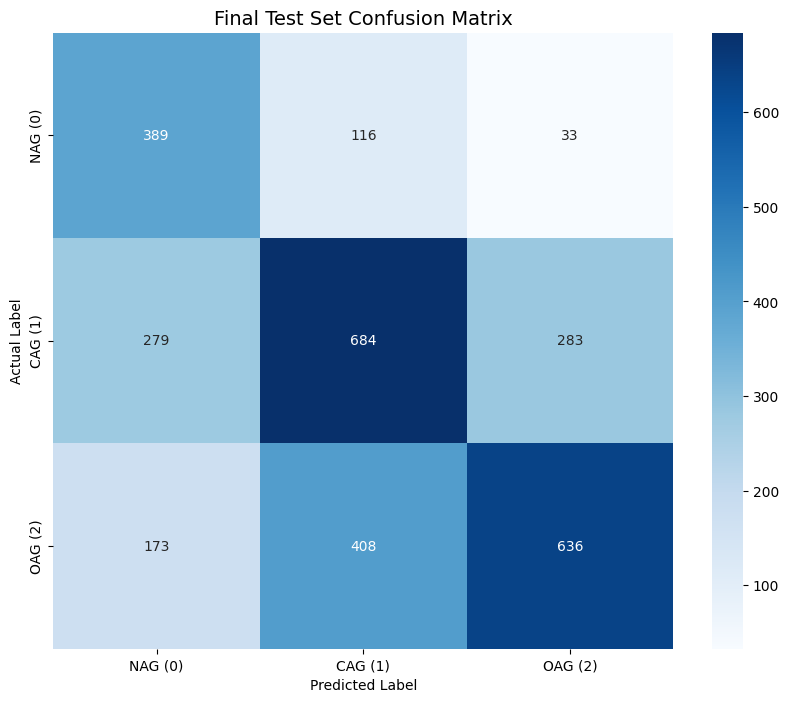

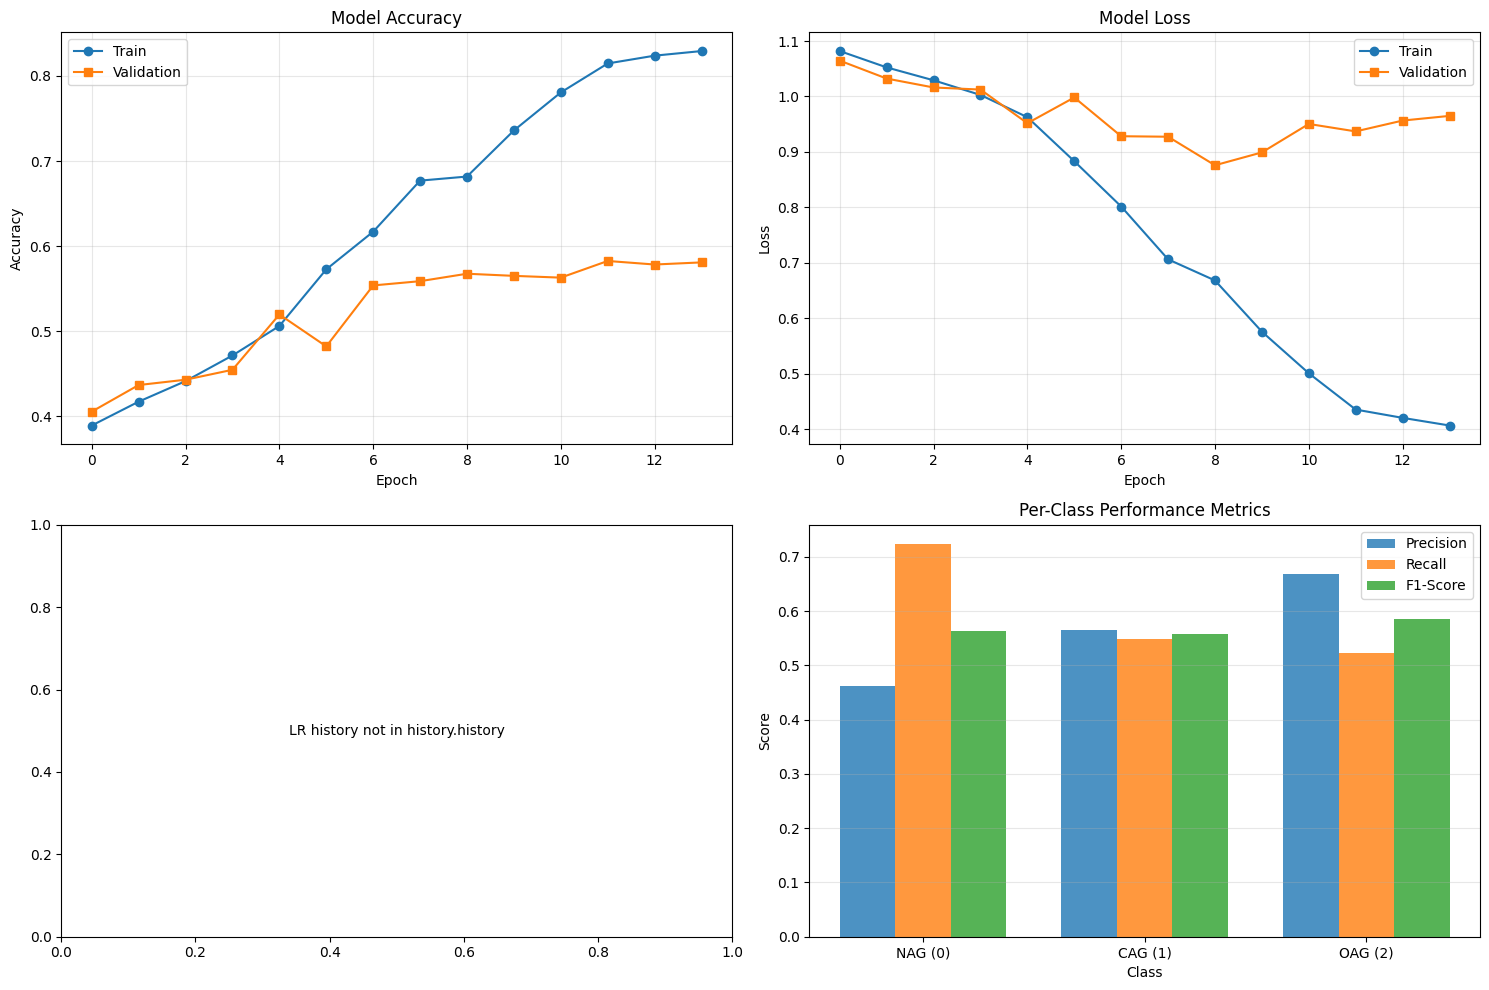

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import balanced_accuracy_score, cohen_kappa_score

# Visualizations
print("Generating visualizations...")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title('Final Test Set Confusion Matrix', fontsize=14)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig("final_confusion_matrix.png", dpi=300, bbox_inches='tight')
print(f"Confusion matrix saved to final_confusion_matrix.png")

# Training History
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Accuracy
axes[0, 0].plot(history.history['accuracy'], label='Train', marker='o')
axes[0, 0].plot(history.history['val_accuracy'], label='Validation', marker='s')
axes[0, 0].set_title('Model Accuracy', fontsize=12)
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Loss
axes[0, 1].plot(history.history['loss'], label='Train', marker='o')
axes[0, 1].plot(history.history['val_loss'], label='Validation', marker='s')
axes[0, 1].set_title('Model Loss', fontsize=12)
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Learning Rate
if 'lr' in history.history:
    axes[1, 0].plot(history.history['lr'], marker='o', color='green')
    axes[1, 0].set_title('Learning Rate Schedule', fontsize=12)
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Learning Rate')
    axes[1, 0].set_yscale('log')
    axes[1, 0].grid(True, alpha=0.3)
else:
    axes[1, 0].text(0.5, 0.5, 'LR history not in history.history',
                    ha='center', va='center', transform=axes[1, 0].transAxes)

# Per-class Performance metrics
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None, zero_division=0)

x_pos = np.arange(len(target_names))
width = 0.25

axes[1, 1].bar(x_pos - width, precision, width, label='Precision', alpha=0.8)
axes[1, 1].bar(x_pos, recall, width, label='Recall', alpha=0.8)
axes[1, 1].bar(x_pos + width, f1, width, label='F1-Score', alpha=0.8)
axes[1, 1].set_xlabel('Class')
axes[1, 1].set_ylabel('Score')
axes[1, 1].set_title('Per-Class Performance Metrics', fontsize=12)
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(target_names)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig("final_training_analysis.png", dpi=300, bbox_inches='tight')
print(f"Training analysis saved to final_training_analysis.png")

model.save("fasttext_bilstm_model_final.h5")
print(f"\nModel saved to fasttext_bilstm_model_final.h5")

# Additional Metrics
print("\n" + "="*60)
print("ADDITIONAL METRICS")
print("="*60)

balanced_acc = balanced_accuracy_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"Cohen's Kappa: {kappa:.4f}")

# Per-class accuracy
print("\n--- Per-Class Accuracy ---")
for i, name in enumerate(target_names):
    class_mask = y_test == i
    if class_mask.sum() > 0:
        class_acc = (y_pred[class_mask] == i).sum() / class_mask.sum()
        print(f"{name} Accuracy: {class_acc:.4f}")

print("\n" + "="*60)
print("ALL TASKS COMPLETE!")
print("="*60)

In [ ]:
!pip install vaderSentiment lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 6.7 MB/s eta 0:00:00


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np
import lightgbm as lgb
from sklearn.metrics import classification_report

In [ ]:
# --- Define VADER analyzer ---
analyzer = SentimentIntensityAnalyzer()

def get_handpicked_features(texts):
    features = []
    for text in texts:
        if not isinstance(text, str):
            text = ""   # Handle non-string inputs safely

        # Sentiment polarity scores (positive, negative, neutral, compound)
        polarity = analyzer.polarity_scores(text)

         # Basic text-level features
        words = text.split()
        num_words = len(words)
        text_len = len(text)

        if text_len == 0:
          # Avoid division by zero for empty strings
            prop_uppercase = 0
            num_exclamation = 0
            num_question = 0
        else:
          # Proportion of uppercase letters and punctuation counts
            prop_uppercase = np.mean([c.isupper() for c in text if c.isalpha()]) if any(c.isalpha() for c in text) else 0
            num_exclamation = text.count('!')
            num_question = text.count('?')
 # Combine all extracted features
        features.append([
            polarity['pos'],
            polarity['neg'],
            polarity['neu'],
            polarity['compound'],
            num_words,
            prop_uppercase,
            num_exclamation,
            num_question
        ])
    return np.array(features)

print("Helper function 'get_handpicked_features' created.")

Helper function 'get_handpicked_features' created.


In [ ]:
print("Defining the 3 new base models...")

# Character N-Gram Model
char_ngram_model = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer='char',
                             ngram_range=(2, 6),
                             max_features=50000)),

    ('clf', LogisticRegression(solver='liblinear', class_weight='balanced'))
])
print("   - Character N-Gram Model defined.")


# Word N-Gram Model
word_ngram_model = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer='word',
                             ngram_range=(1, 2),
                             max_features=50000)),

    ('clf', LogisticRegression(solver='liblinear', class_weight='balanced'))
])
print("   - Word N-Gram Model defined.")


#  Hand-Picked Feature Model
# Scaler + Logistic Regression
handpicked_model = Pipeline([
    ('scaler', StandardScaler()), # Scale features for better performance
    ('clf', LogisticRegression(solver='liblinear', class_weight='balanced'))
])
print("   - Hand-Picked Feature Model defined.")
print("\nAll 3 models are ready to be trained.")

Defining the 3 new base models...
   - Character N-Gram Model defined.
   - Word N-Gram Model defined.
   - Hand-Picked Feature Model defined.

All 3 models are ready to be trained.


In [ ]:
print("Training and evaluating new models...")
print("="*60)

#  Character N-Gram Model
print("\nTraining Character N-Gram Model... (This may take a minute)")
char_ngram_model.fit(X_train, y_train)
print("Training complete.")

print("\n--- Evaluation: Character N-Gram Model ---")
y_pred_char = char_ngram_model.predict(X_test)
target_names = ['NAG (0)', 'CAG (1)', 'OAG (2)']
print(classification_report(y_test, y_pred_char, target_names=target_names, zero_division=0))
print("="*60)


#  Word N-Gram Model
print("\nTraining Word N-Gram Model...")
word_ngram_model.fit(X_train, y_train)
print("Training complete.")

print("\n--- Evaluation: Word N-Gram Model ---")
y_pred_word = word_ngram_model.predict(X_test)
print(classification_report(y_test, y_pred_word, target_names=target_names, zero_division=0))
print("="*60)


# Hand-Picked Feature Model
print("\nTraining Hand-Picked Feature Model...")
# extract the features from the raw text
print("   - Extracting hand-picked features for X_train...")
X_train_handpicked = get_handpicked_features(X_train)
print("   - Extracting hand-picked features for X_test...")
X_test_handpicked = get_handpicked_features(X_test)

# Training the model on those features
handpicked_model.fit(X_train_handpicked, y_train)
print("Training complete.")

print("\n--- Evaluation: Hand-Picked Feature Model ---")
y_pred_handpicked = handpicked_model.predict(X_test_handpicked)
print(classification_report(y_test, y_pred_handpicked, target_names=target_names, zero_division=0))
print("="*60)

Training and evaluating new models...

Training Character N-Gram Model... (This may take a minute)
Training complete.

--- Evaluation: Character N-Gram Model ---
              precision    recall  f1-score   support

     NAG (0)       0.59      0.60      0.59       538
     CAG (1)       0.58      0.62      0.60      1246
     OAG (2)       0.66      0.60      0.63      1217

    accuracy                           0.61      3001
   macro avg       0.61      0.61      0.61      3001
weighted avg       0.61      0.61      0.61      3001


Training Word N-Gram Model...
Training complete.

--- Evaluation: Word N-Gram Model ---
              precision    recall  f1-score   support

     NAG (0)       0.63      0.55      0.59       538
     CAG (1)       0.58      0.63      0.60      1246
     OAG (2)       0.64      0.62      0.63      1217

    accuracy                           0.61      3001
   macro avg       0.62      0.60      0.61      3001
weighted avg       0.61      0.61      0.6

In [ ]:
def get_stacker_features(texts):
    """
    Extracts the extra syntactic features for the stacker (Section 3.6)
    """
    features = []
    for text in texts:
        if not isinstance(text, str):
            text = ""

        text_len = len(text)
        if text_len == 0:
             features.append([0, 0, 0, 0])
             continue

        num_uppercase = sum(1 for c in text if c.isupper())
        num_non_alpha = sum(1 for c in text if not c.isalnum())
        num_exclamation = text.count('!')

        features.append([
            text_len,
            num_uppercase / text_len,
            num_non_alpha / text_len,
            num_exclamation / text_len
        ])
    return np.array(features)

print("Helper function 'get_stacker_features' created.")

Helper function 'get_stacker_features' created.


In [ ]:
print("Creating new feature sets for the stacker model...")

# --- 1. CREATE STACKER TRAINING DATA (from X_val) ---
print("   - Generating predictions from base models on X_val...")
# Get predictions (probabilities) from all 4 models on the validation set
gru_val_preds = model.predict(X_val_pad) # (From Cell 7)
char_val_preds = char_ngram_model.predict_proba(X_val) # (From Cell 6)
word_val_preds = word_ngram_model.predict_proba(X_val) # (From Cell 6)

# Need to extract handpicked features for X_val first
X_val_handpicked = get_handpicked_features(X_val)
handpicked_val_preds = handpicked_model.predict_proba(X_val_handpicked)

# Get the extra syntactic features (from paper Sec 3.6)
syntactic_val_features = get_stacker_features(X_val)

# Combine all features horizontally
X_stack_train = np.hstack([
    gru_val_preds,
    char_val_preds,
    word_val_preds,
    handpicked_val_preds,
    syntactic_val_features
])

y_stack_train = y_val # The target for the stacker
print(f"   - Stacker training data created. Shape: {X_stack_train.shape}")


# --- 2. CREATE STACKER TEST DATA (from X_test) ---
print("   - Generating predictions from base models on X_test...")
# Get predictions (probabilities) from all 4 models on the test set
gru_test_preds = model.predict(X_test_pad) # (From Cell 7)
char_test_preds = char_ngram_model.predict_proba(X_test) # (From Cell 6)
word_test_preds = word_ngram_model.predict_proba(X_test) # (From Cell 6)
# X_test_handpicked already exists from the previous cell
handpicked_test_preds = handpicked_model.predict_proba(X_test_handpicked)

# Get the extra syntactic features
syntactic_test_features = get_stacker_features(X_test)

# Combine all features horizontally
X_stack_test = np.hstack([
    gru_test_preds,
    char_test_preds,
    word_test_preds,
    handpicked_test_preds,
    syntactic_test_features
])

y_stack_test = y_test # The target for our final evaluation
print(f"   - Stacker test data created. Shape: {X_stack_test.shape}")

Creating new feature sets for the stacker model...
   - Generating predictions from base models on X_val...
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
   - Stacker training data created. Shape: (2400, 16)
   - Generating predictions from base models on X_test...
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
   - Stacker test data created. Shape: (3001, 16)


In [ ]:
print("Training the final ensemble (stacker) model...")

# Initialize the stacker model (Gradient Boosting)
# Using parameters from the paper (Section 3.6)
stacker_model = lgb.LGBMClassifier(
    n_estimators=75,  # 75 trees
    max_depth=3,      # depth of 3
    bagging_fraction=0.8,
    feature_fraction=0.45,
    random_state=42,
    class_weight='balanced'
)

# Train the stacker on the predictions from the validation set
stacker_model.fit(X_stack_train, y_stack_train)

print("Ensemble model trained.")
print("\n" + "="*60)
print("--- FINAL ENSEMBLE EVALUATION ON TEST SET ---")
print("="*60)

# Make final predictions on the test set
y_pred_ensemble = stacker_model.predict(X_stack_test)

# Print the final report
target_names = ['NAG (0)', 'CAG (1)', 'OAG (2)']
print(classification_report(y_stack_test, y_pred_ensemble, target_names=target_names, zero_division=0))

Training the final ensemble (stacker) model...
[LightGBM] [Warning] feature_fraction is set=0.45, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.45
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.45, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.45
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000362 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3605
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 15
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warni

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
